In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from datasets import load_dataset
dataset = load_dataset('lukebarousse/data_jobs')
df=dataset['train'].to_pandas()

c:\Users\manik\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#data cleaning
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [3]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

# Drop NaN values from the 'salary_year_avg' column for accurate visualization
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

df_DA_US_exploded = df_DA_US.explode('job_skills')

df_DA_US_exploded[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel


In [4]:
df_da_skills = df_DA_US_exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)
df_da_skills = df_da_skills.rename(columns={'count': 'skill_count', 'median': 'median_salary'})
DA_job_count = len(df_DA_US)  # Find count of Data Analyst jobs in US with salary info

df_da_skills['skill_percent'] = df_da_skills['skill_count'] / DA_job_count * 100

df_da_skills = df_da_skills[df_da_skills['skill_count'] > 0]

df_da_skills

,skill_count,median_salary,skill_percent
job_skills,,,
sql,2508,91000.0,57.655172
excel,1808,84392.0,41.563218
python,1431,97500.0,32.896552
tableau,1364,92875.0,31.356322
sas,926,90000.0,21.287356
...,...,...,...
couchbase,1,160515.0,0.022989
chainer,1,100000.0,0.022989
chef,1,85000.0,0.022989


In [9]:
skill_limit = 5
df_da_skills = df_da_skills[df_da_skills['skill_percent'] > skill_limit]
df_da_skills

,skill_count,median_salary,skill_percent
job_skills,,,
sql,2508,91000.00,57.655172
excel,1808,84392.00,41.563218
python,1431,97500.00,32.896552
tableau,1364,92875.00,31.356322
sas,926,90000.00,21.287356
r,893,92500.00,20.528736
power bi,838,90000.00,19.264368
powerpoint,462,85000.00,10.620690
word,461,81194.75,10.597701


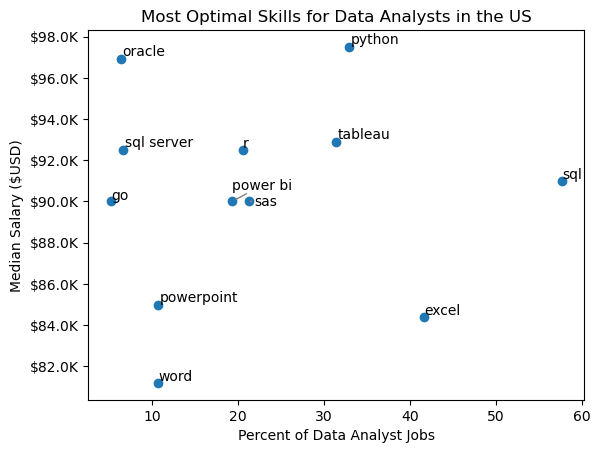

In [22]:
from adjustText import adjust_text
plt.scatter(data=df_da_skills,x='skill_percent',y='median_salary')
plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Salary ($USD)')  # Assuming this is the label you want for y-axis
plt.title('Most Optimal Skills for Data Analysts in the US')
y_ticks=plt.FuncFormatter(lambda y,pos:f'${y/1000}K')
plt.gca().yaxis.set_major_formatter(y_ticks)
texts=[]
for i,txt in enumerate(df_da_skills.index):
    texts.append(plt.text(df_da_skills['skill_percent'].iloc[i],df_da_skills['median_salary'].iloc[i],txt))
adjust_text(texts,arrowprops=dict(arrowstyle='->',color='gray'))
plt.show()